In [13]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

import graphviz
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('./Kaggle_Sirio_Libanes_ICU_Prediction.csv')
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [15]:
df_aggregated = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=True).agg({
    **{column: list for column in df.columns[1:]}
}) 
df_aggregated

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,"[1, 1, 1, 1, 1]","[60th, 60th, 60th, 60th, 60th]","[0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",...,"[-1.0, -1.0, nan, -1.0, -0.238095238095237]","[-1.0, -1.0, nan, -1.0, -0.818181818181818]","[-1.0, -1.0, nan, nan, -0.389966555183947]","[-1.0, -1.0, nan, nan, 0.407557993817706]","[-1.0, -1.0, nan, nan, -0.230461650308979]","[-1.0, -1.0, nan, nan, 0.096774193548387]","[-1.0, -1.0, nan, -1.0, -0.242281527995813]","[-1.0, -1.0, nan, -1.0, -0.814432989690722]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]","[0, 0, 0, 0, 1]"
1,"[1, 1, 1, 1, 1]","[90th, 90th, 90th, 90th, 90th]","[1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]",...,"[-1.0, -1.0, -1.0, -0.880952380952381, 0.14285...","[-1.0, -1.0, -1.0, -1.0, -0.797979797979798]","[-1.0, -1.0, -1.0, -0.906832298136646, 0.31568...","[-1.0, -1.0, -1.0, -0.831132279714224, 0.20035...","[-1.0, -1.0, -1.0, -0.940966921119593, -0.2395...","[-1.0, -1.0, -1.0, -0.817204301075269, 0.64516...","[-1.0, -1.0, -1.0, -0.882574283119242, 0.13970...","[-1.0, -1.0, -1.0, -1.0, -0.802316930598363]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]","[1, 1, 1, 1, 1]"
2,"[0, 0, 0, 0, 0]","[10th, 10th, 10th, 10th, 10th]","[0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",...,"[nan, nan, nan, -1.0, -0.500000000000001]","[nan, nan, -0.95959595959596, -0.7979797979797...","[nan, nan, -0.515527950310559, -0.658862876254...","[nan, nan, -0.351327691858769, -0.563758389261...","[nan, nan, -0.747001090512541, -0.721833659725...","[nan, nan, -0.756272401433692, -0.926881720430...","[nan, nan, nan, -1.0, -0.505464480874318]","[nan, nan, -0.961262105592003, -0.801292665990...","[0-2, 2-4, 4-6, 6-12, ABOVE_12]","[0, 0, 0, 0, 1]"
3,"[0, 0, 0, 0, 0]","[40th, 40th, 40th, 40th, 40th]","[1, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",...,"[nan, nan, -1.0, -1.0, -0.0476190476190475]","[nan, nan, -1.0, -1.0, -0.171717171717172]","[nan, nan, -1.0, -1.0, -0.308695652173913]","[nan, nan, -1.0, -1.0, -0.0577181208053691]","[nan, nan, -1.0, -1.0, -0.0690937561166569]","[nan, nan, -1.0, -1.0, -0.329749103942652]","[nan, nan, -1.0, -1.0, -0.0476190476190473]","[nan, nan, -1.0, -1.0, -0.172436245252306]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]","[0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0]","[10th, 10th, 10th, 10th, 10th]","[0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",...,"[nan, nan, -0.952380952380952, -0.690476190476...","[nan, nan, -0.97979797979798, -0.9595959595959...","[nan, nan, -1.0, -1.0, -0.652173913043478]","[nan, nan, -0.883668903803132, -1.0, -0.596164...","[nan, nan, -0.956805064233849, -0.926208651399...","[nan, nan, -0.870967741935484, -1.0, -0.817204...","[nan, nan, -0.953536131433705, -0.698796722990...","[nan, nan, -0.980333068992863, -0.960463386119...","[0-2, 2-4, 4-6, 6-12, ABOVE_12]","[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,

In [16]:
def get_last_zero_value(icu_list, values_list):
    for i in range(len(icu_list)-1,0,-1):
        if icu_list[i] == 0 and not pd.isna(values_list[i]):
            return values_list[i]
    return None


for column in df_aggregated:
    if column != 'ICU':
        df_aggregated[column] = df_aggregated.apply(
            lambda row: get_last_zero_value(row['ICU'], row[column]),
            axis=1
        )
df_aggregated['ICU'] = df_aggregated['ICU'].apply(lambda x: 0 if sum(x) == 0 else 1)
df_aggregated

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,1.0,60th,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1
1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1
2,0.0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.797980,-0.658863,-0.563758,-0.721834,-0.926882,-1.000000,-0.801293,6-12,1
3,0.0,40th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047619,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,ABOVE_12,0
4,0.0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.642857,-0.939394,-0.652174,-0.596165,-0.634847,-0.817204,-0.645793,-0.940077,ABOVE_12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.0,40th,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1
381,1.0,Above 90th,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.690476,-0.959596,-0.982609,-0.871507,-0.804670,-0.878136,-0.697169,-0.960052,ABOVE_12,0
382,0.0,50th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1


In [17]:
df_final = df_aggregated.dropna()
df_final = df_final.select_dtypes(exclude=['object'])
df_final = df_final.iloc[:, 1:]
df_final

,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.352941,-0.047619,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.823529,-0.642857,-0.939394,-0.652174,-0.596165,-0.634847,-0.817204,-0.645793,-0.940077,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.941176,-0.738095,-0.919192,-0.758651,-0.683267,-0.581849,-0.939068,-0.736640,-0.920927,0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.823529,-0.666667,0.858586,-0.884058,-0.637584,-0.781230,-0.826825,-0.672101,0.917526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.882353,-0.690476,-0.959596,-0.982609,-0.871507,-0.804670,-0.878136,-0.697169,-0.960052,0
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1


In [18]:
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(df_final.iloc[:, :-1], df_final.iloc[:, -1])
baseline_accuracy = baseline_model.score(df_final.iloc[:, :-1], df_final.iloc[:, -1])

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.7872340425531915


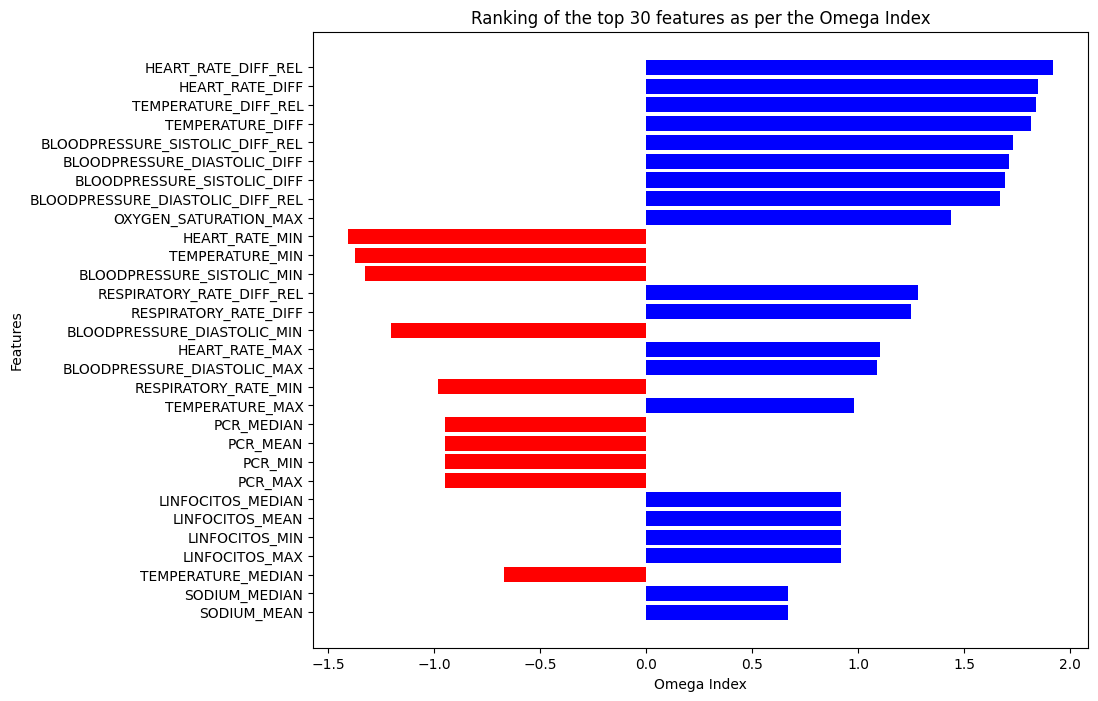

In [19]:
omega_values = []
for column in df_final.columns:
    if column != 'ICU':
        in_icu_mean = df_final.loc[df_final['ICU'] == 1, column].median()
        not_in_icu_mean = df_final.loc[df_final['ICU'] == 0, column].median()
        column_range = df_final[column].std()

        if column_range != 0:
            omega = (not_in_icu_mean - in_icu_mean) / column_range
            omega_values.append([column, omega])

omega_values.sort(key=lambda x: abs(x[1]), reverse=True)

n = 30

colors = ['red' if val[1] < 0 else 'blue' for val in omega_values[:n]]
plt.figure(figsize=(10, 8))
plt.barh(range(n), [val[1] for val in omega_values[:n]], align='center', color=colors)
plt.yticks(range(n), [val[0] for val in omega_values[:n]])
plt.xlabel('Omega Index')
plt.ylabel('Features')
plt.title(f'Ranking of the top {n} features as per the Omega Index')
plt.gca().invert_yaxis()
plt.show()

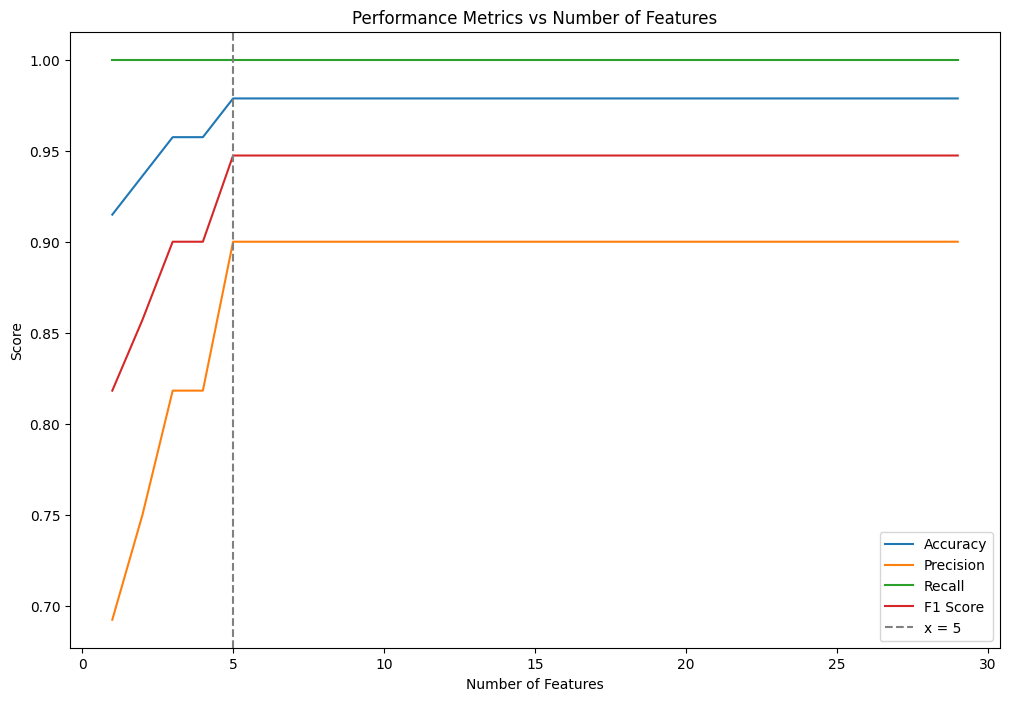

In [20]:
num_features = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for k in range(1,n):
    X = df_final[[omega_values[i][0] for i in range(k)]]
    y = df_final.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    model = DecisionTreeClassifier(random_state=42, criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    num_features.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(12,8))
plt.plot(num_features, accuracy_scores, linestyle='-', label='Accuracy')
plt.plot(num_features, precision_scores, linestyle='-', label='Precision')
plt.plot(num_features, recall_scores, linestyle='-', label='Recall')
plt.plot(num_features, f1_scores, linestyle='-', label='F1 Score')
plt.axvline(x=5, color='gray', linestyle='--', label='x = 5')
plt.title('Performance Metrics vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.show()

In [21]:
X = df_final[[omega_values[i][0] for i in range(5)]]
X

,HEART_RATE_DIFF_REL,HEART_RATE_DIFF,TEMPERATURE_DIFF_REL,TEMPERATURE_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-0.069094,0.251908,-0.047619,-0.047619,-0.057718
4,-0.634847,-0.389313,-0.645793,-0.642857,-0.596165
5,-0.581849,-0.480916,-0.736640,-0.738095,-0.683267
6,-0.781230,-0.679389,-0.672101,-0.666667,-0.637584
...,...,...,...,...,...
380,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
381,-0.804670,-0.770992,-0.697169,-0.690476,-0.871507
382,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [22]:
y = df_final.iloc[:, -1]
y.value_counts()

ICU
0    185
1     50
Name: count, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
model = DecisionTreeClassifier(random_state=42, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
cross_val_scores = cross_val_score(model, X, y, cv=5)
avg_cross_val_accuracy = cross_val_scores.mean()
std_cross_val_accuracy = cross_val_scores.std()

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')
print(f'Training Accuracy: {train_accuracy*100:.2f}')
print(f'Testing Accuracy: {test_accuracy*100:.2f}')
print(f'Average Cross-Validation Accuracy: {avg_cross_val_accuracy*100:.2f}%')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_cross_val_accuracy*100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 97.87%
Precision: 90.00%
Recall: 100.00%
F1 Score: 94.74%
Training Accuracy: 100.00
Testing Accuracy: 97.87
Average Cross-Validation Accuracy: 95.74%
Standard Deviation of Cross-Validation Accuracy: 1.35%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.90      1.00      0.95         9

    accuracy                           0.98        47
   macro avg       0.95      0.99      0.97        47
weighted avg       0.98      0.98      0.98        47



Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R² (R-Squared): 0.86
ROC AUC: 0.99
Confusion Matrix:


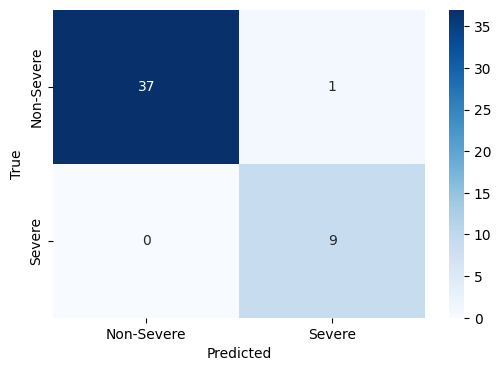

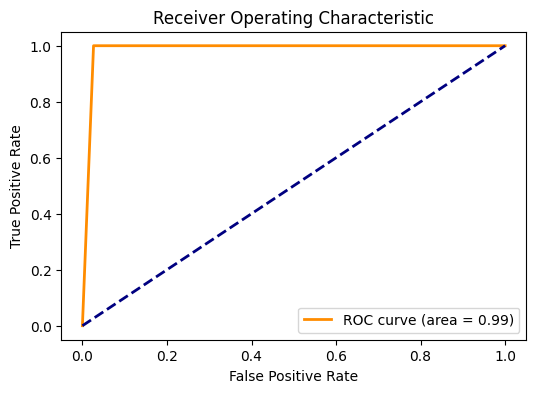

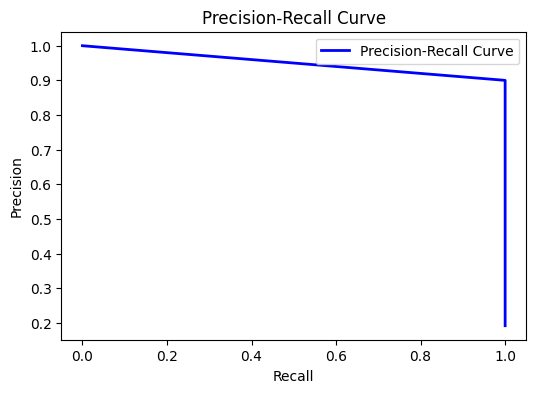

In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R² (R-Squared): {r2:.2f}')

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Severe', 'Severe'], yticklabels=['Non-Severe', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()